# Import data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
import torch.nn as nn

df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# EDA

- There are no missing values in the data
- Quality (our target variable) is a int that ranges from 3 to 8.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Univariate Analysis

- We can observe that fixed acidity, volatile acidity, density and pH are normally distributed.
- Chlorides, residual sugar, total sulfer dioxide, sulphates and alcohol are following some kind of power law distribution.
- The citric acid distribution doesn't seem to have a recognizable pattern.
- The remaining features are normally distributed but are heavily skewed in some way or the other

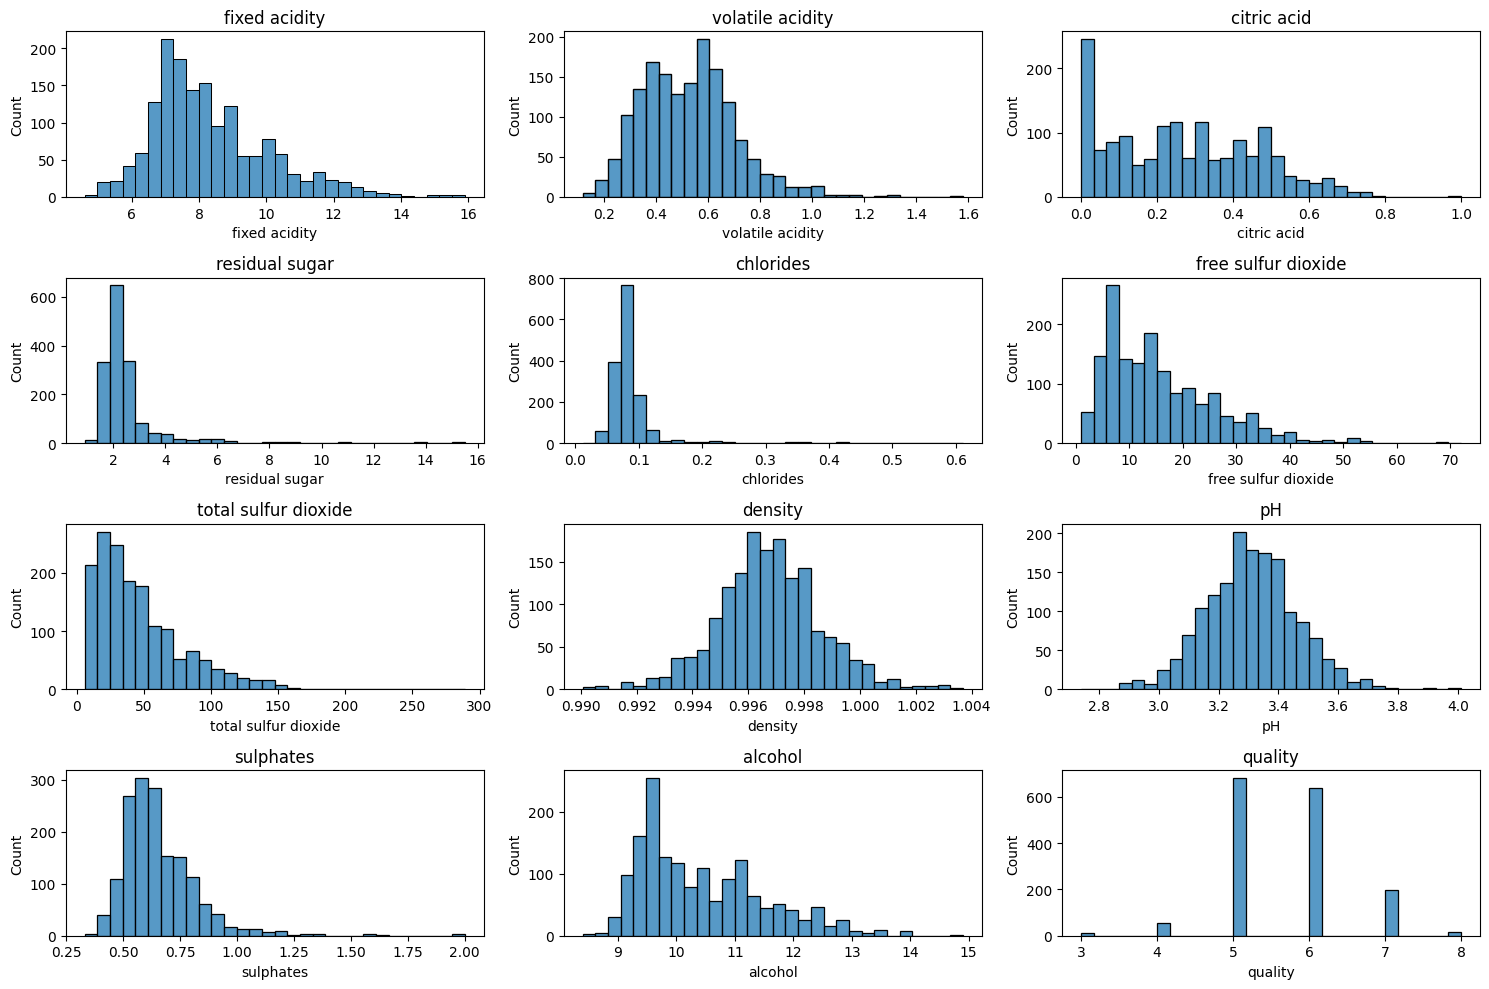

In [4]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(df.columns):
    plt.subplot(4, 3, i + 1)  # Adjust the grid parameters based on your number of features
    sns.histplot(df[feature], kde=False, bins=30)
    plt.title(feature)
    plt.tight_layout()

plt.show()

## Bivariate Analysis

- We can observe that quality has its strongest positive correlations with alcohol and sulphates and citric acid content.
- These relationships make sense as acidity could be something sommelier may value in wine.
- It's strongest negative correlation is with volatile acidity and total sulfur dioxide.
- Higher sulfur dioxide makes sense as well as it can indicate how much of the wine has oxidized. More oxidization would mean lower quality.

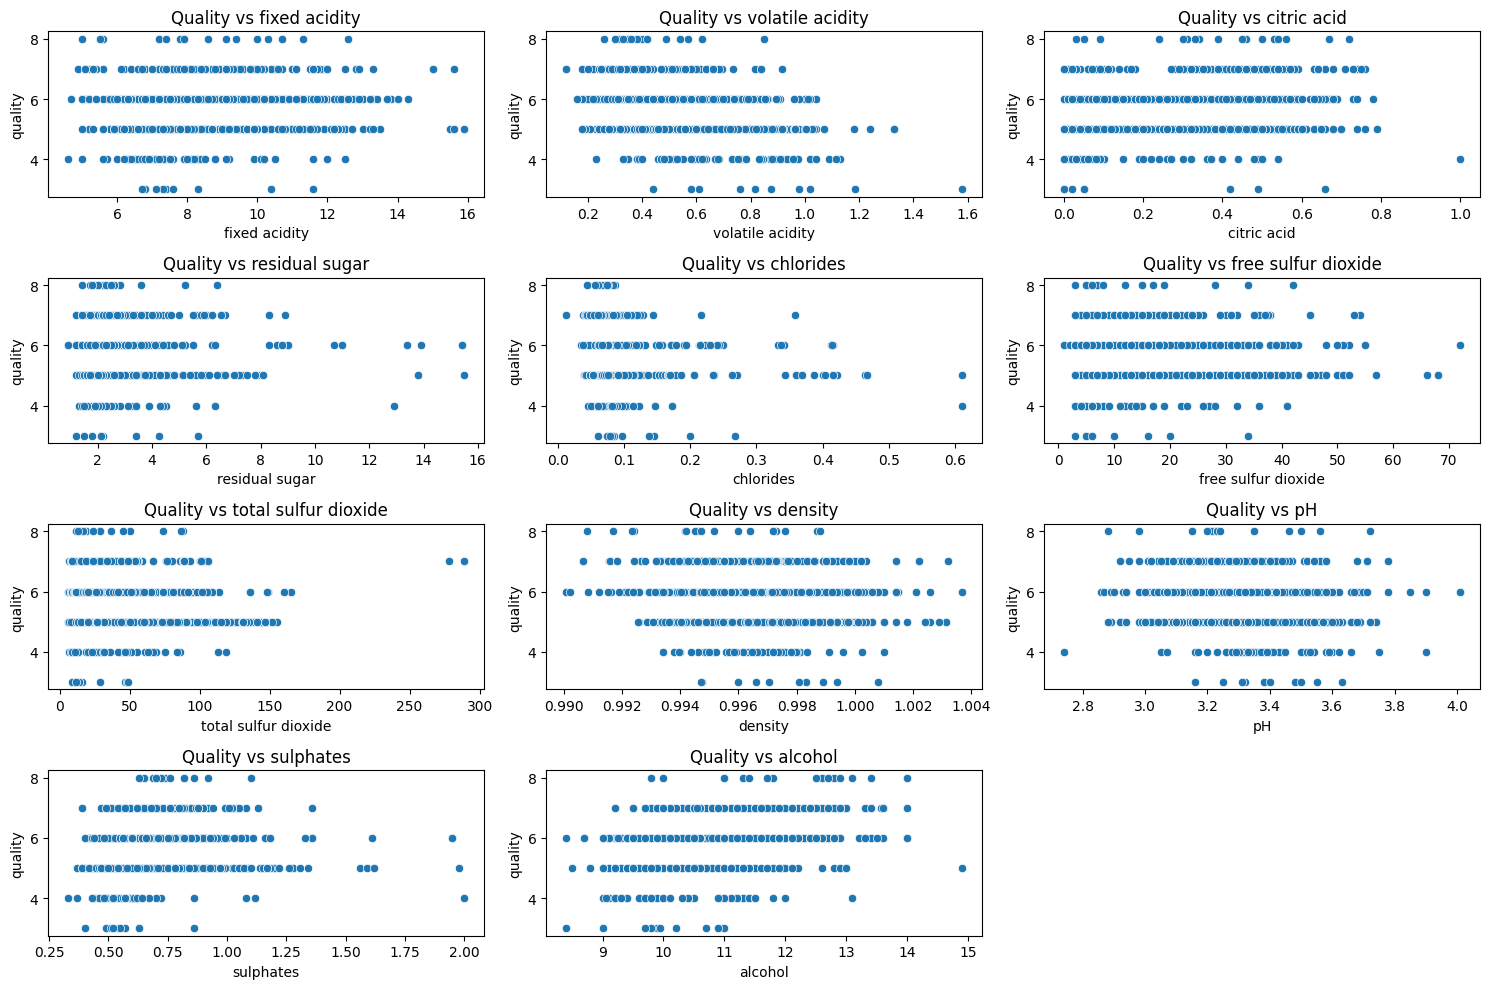

In [5]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Iterate over each numeric feature (excluding 'quality') and create a subplot with a scatter plot
for i, feature in enumerate(df.drop(columns=['quality']).columns):
    plt.subplot(4, 3, i + 1)  # Adjust the grid parameters based on your number of features
    sns.scatterplot(data=df, x=feature, y='quality')
    plt.title(f'Quality vs {feature}')
    plt.tight_layout()

# Show the plot
plt.show()


In [6]:
corr = df.corr()
quality_corr = corr['quality'].sort_values(ascending=False)
quality_corr

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [7]:
corr = df.corr()
quality_corr = corr['quality'].sort_values(ascending=False)

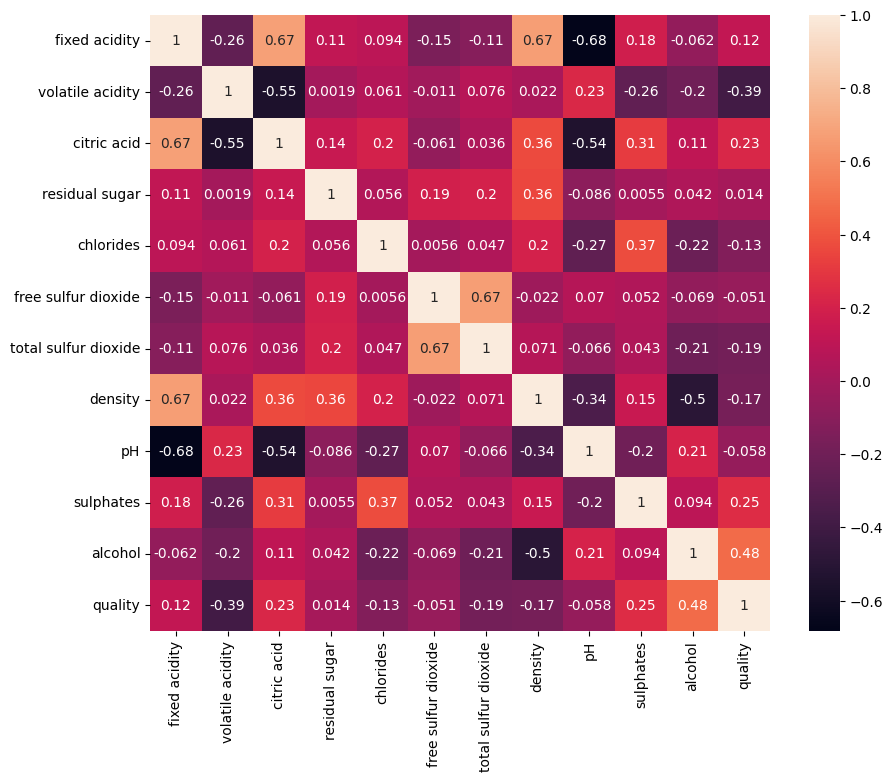

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Creating a basic MLP

## Defining some methods to be reused later in the notebook

In [12]:
def train_model(model, train_loader, val_loader, criterion, optimiser, epochs=100, print_res=False):
    loss_valid = []
    loss_train = []

    for epoch in range(epochs):
        model.train()
        epoch_loss_train = []
        for features, targets in train_loader:
            optimiser.zero_grad()
            output = model(features)
            loss = criterion(output, targets)
            loss.backward()
            optimiser.step()
            epoch_loss_train.append(loss.item())
    
        train_loss_avg = sum(epoch_loss_train) / len(epoch_loss_train)
        loss_train.append(train_loss_avg)
    
        # Validation
        model.eval()
        with torch.no_grad():
            predictions = model(valid_x)
            validation_loss = criterion(predictions, valid_y)
            loss_valid.append(validation_loss.item())
        if (print_res):
            print(f'Epoch {epoch+1}: Training Loss: {train_loss_avg:.4f}, Validation Loss: {validation_loss:.4f}')

    return loss_valid, loss_train

def plot_model_metrics(train, valid, title="Loss"):
    plt.figure(figsize=(10, 5))
    plt.plot(train, label=f'Training {title}')
    plt.plot(valid, label=f'Validation {title}')
    plt.title(f'Training and Validation {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def compute_mse(model, x, y):
    model.eval()
    hypotheses = model.forward(x)
    losses = criterion(hypotheses, y.float()).item()
    return losses

def print_metrics(model, x, y):
    model.eval()

    # Predictions
    with torch.no_grad():
        predictions = model(x)
        predictions = predictions.detach().cpu().numpy()
        true_values = y.detach().cpu().numpy()
    
    mse = mean_squared_error(true_values, predictions)    
    print("MSE:", mse)

def print_predictions(model, x, y):
    model.eval()
    
    with torch.no_grad():
        predictions = model(x)
    
    predictions = predictions.detach().cpu().numpy().flatten().tolist()
    true_values = y.detach().cpu().numpy().flatten().tolist()
    
    for pred, true in zip(predictions, true_values):
        print(f'Prediction: {pred:.3f}, True Value: {true:.3f}')

In [13]:
class WineDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return len(self.x)

In [14]:
class WineMLP(nn.Module):
    def __init__(self, n_inputs, hidden_size):
        super(WineMLP, self).__init__()
        self.linear1 = nn.Linear(n_inputs, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, X):
        out = self.linear1(X)
        out = self.relu(out)
        out = self.linear2(out)
        return out

In [58]:
X = df.drop(columns=['quality'])
y = df['quality'] 

In [59]:
train_x, everything_else_x, train_y, ee_y = train_test_split(X, y, test_size=0.3, random_state=42)
valid_x, test_x, valid_y, test_y = train_test_split(everything_else_x, ee_y, test_size=0.5, random_state=42)

train_x = torch.tensor(train_x.to_numpy(), dtype=torch.float)
valid_x = torch.tensor(valid_x.to_numpy(), dtype=torch.float)
test_x = torch.tensor(test_x.to_numpy(), dtype=torch.float)

# Targets with tensor size correction
train_y = torch.tensor(train_y.to_numpy(), dtype=torch.float).view(-1, 1)
valid_y = torch.tensor(valid_y.to_numpy(), dtype=torch.float).view(-1, 1)
test_y = torch.tensor(test_y.to_numpy(), dtype=torch.float).view(-1, 1)

In [60]:
train_y.shape

torch.Size([1119, 1])

In [61]:
wine_train = WineDataset(train_x, train_y)
wine_val = WineDataset(valid_x, valid_y)
wine_test = WineDataset(test_x, test_y)

train_loader = DataLoader(dataset=wine_train, batch_size=8, shuffle=True)
val_loader = DataLoader(dataset=wine_val, batch_size=8, shuffle=False)
test_loader = DataLoader(dataset=wine_test, batch_size=8, shuffle=False)

## Basic MLP
- Epochs: 100
- Lr = 0.0001
- Optimiser = SGD
- Hidden_size = 5

In [93]:
model = WineMLP(n_inputs=train_x.shape[1], hidden_size=5)
criterion = nn.MSELoss()  # MSE for regression
optimiser = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
loss_valid, loss_train = train_model(model, train_loader, val_loader, criterion, optimiser)
print_metrics(model,test_x,test_y)

MSE: 0.50511706


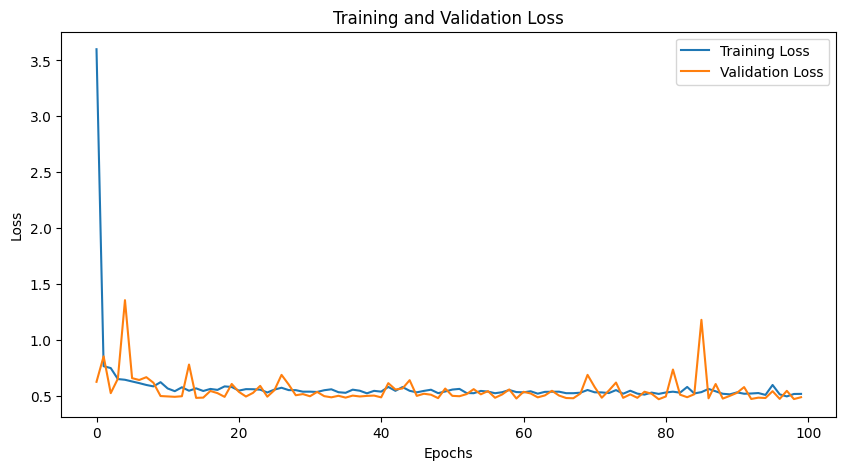

In [95]:
plot_model_metrics(loss_train, loss_valid, title="Loss")

In [96]:
print('Valid ', end="") 
print_metrics(model,valid_x,valid_y)

Valid MSE: 0.48484972


In [97]:
print('Test ', end="") 
print_metrics(model,test_x,test_y)

Test MSE: 0.50511706


# Making changes to basic MLP

## Normalising the data
### Everything else the same we only normalise the data on this run.

    We can see that just normalising the data makes a huge difference on our performance. The validation loss is no longer unstable as we can see in the plot and the model's MSE drops by around 20%.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df.drop(columns=['quality'])
y = df['quality'] 
X = scaler.fit_transform(X)

In [25]:
train_x, everything_else_x, train_y, ee_y = train_test_split(X, y, test_size=0.3, random_state=42)
valid_x, test_x, valid_y, test_y = train_test_split(everything_else_x, ee_y, test_size=0.5, random_state=42)

train_x = torch.tensor(train_x, dtype=torch.float)
valid_x = torch.tensor(valid_x, dtype=torch.float)
test_x = torch.tensor(test_x, dtype=torch.float)

train_y = torch.tensor(train_y.to_numpy(), dtype=torch.float).view(-1, 1)
valid_y = torch.tensor(valid_y.to_numpy(), dtype=torch.float).view(-1, 1)
test_y = torch.tensor(test_y.to_numpy(), dtype=torch.float).view(-1, 1)

In [26]:
wine_train = WineDataset(train_x, train_y)
wine_val = WineDataset(valid_x, valid_y)
wine_test = WineDataset(test_x, test_y)

train_loader = DataLoader(dataset=wine_train, batch_size=8, shuffle=True)
val_loader = DataLoader(dataset=wine_val, batch_size=8, shuffle=False)
test_loader = DataLoader(dataset=wine_test, batch_size=8, shuffle=False)

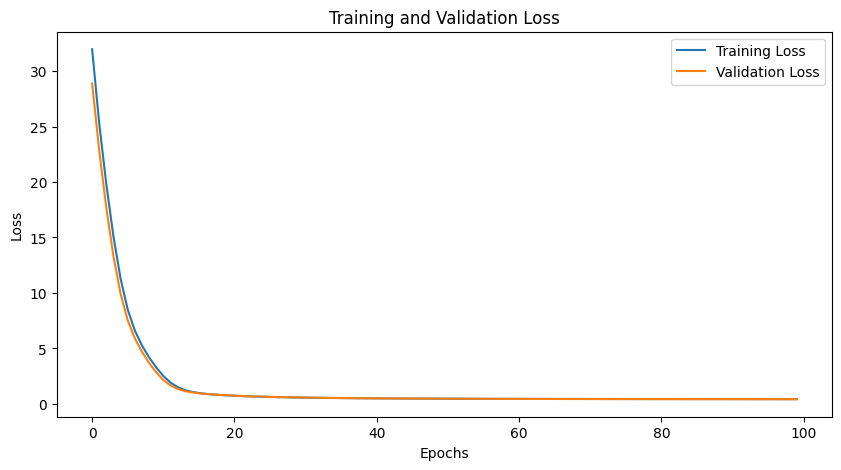

In [27]:
res = []
for i in range(1):
    normal_model = WineMLP(n_inputs=train_x.shape[1], hidden_size=5)
    criterion = nn.MSELoss()  # MSE for regression
    optimiser = torch.optim.SGD(normal_model.parameters(), lr=0.0001,  momentum=0.7)
    loss_valid, loss_train = train_model(normal_model, train_loader, val_loader, criterion, optimiser, 100)
    res.append(compute_mse(normal_model,test_x, test_y))

plot_model_metrics(loss_train, loss_valid)

In [28]:
print_metrics(normal_model,valid_x, valid_y)

MSE: 0.42602542


In [29]:
print_metrics(normal_model,test_x, test_y)

MSE: 0.4275254


In [30]:
print_predictions(normal_model,valid_x,valid_y)

Prediction: 4.943, True Value: 5.000
Prediction: 5.303, True Value: 6.000
Prediction: 5.320, True Value: 6.000
Prediction: 5.582, True Value: 6.000
Prediction: 5.883, True Value: 5.000
Prediction: 5.528, True Value: 6.000
Prediction: 5.309, True Value: 5.000
Prediction: 6.323, True Value: 7.000
Prediction: 5.206, True Value: 6.000
Prediction: 5.727, True Value: 6.000
Prediction: 5.144, True Value: 5.000
Prediction: 5.438, True Value: 5.000
Prediction: 5.018, True Value: 6.000
Prediction: 5.143, True Value: 5.000
Prediction: 5.375, True Value: 6.000
Prediction: 5.374, True Value: 5.000
Prediction: 5.620, True Value: 6.000
Prediction: 5.001, True Value: 6.000
Prediction: 5.703, True Value: 6.000
Prediction: 6.967, True Value: 7.000
Prediction: 5.457, True Value: 6.000
Prediction: 5.860, True Value: 5.000
Prediction: 5.250, True Value: 5.000
Prediction: 6.074, True Value: 6.000
Prediction: 5.048, True Value: 5.000
Prediction: 5.981, True Value: 6.000
Prediction: 6.022, True Value: 5.000
P

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df.drop(columns=['quality'])
y = df['quality'] 
X = scaler.fit_transform(X)

In [99]:
train_x, everything_else_x, train_y, ee_y = train_test_split(X, y, test_size=0.3, random_state=42)
valid_x, test_x, valid_y, test_y = train_test_split(everything_else_x, ee_y, test_size=0.5, random_state=42)

train_x = torch.tensor(train_x, dtype=torch.float)
valid_x = torch.tensor(valid_x, dtype=torch.float)
test_x = torch.tensor(test_x, dtype=torch.float)

train_y = torch.tensor(train_y.to_numpy(), dtype=torch.float).view(-1, 1)
valid_y = torch.tensor(valid_y.to_numpy(), dtype=torch.float).view(-1, 1)
test_y = torch.tensor(test_y.to_numpy(), dtype=torch.float).view(-1, 1)

In [100]:
wine_train = WineDataset(train_x, train_y)
wine_val = WineDataset(valid_x, valid_y)
wine_test = WineDataset(test_x, test_y)

train_loader = DataLoader(dataset=wine_train, batch_size=8, shuffle=True)
val_loader = DataLoader(dataset=wine_val, batch_size=8, shuffle=False)
test_loader = DataLoader(dataset=wine_test, batch_size=8, shuffle=False)

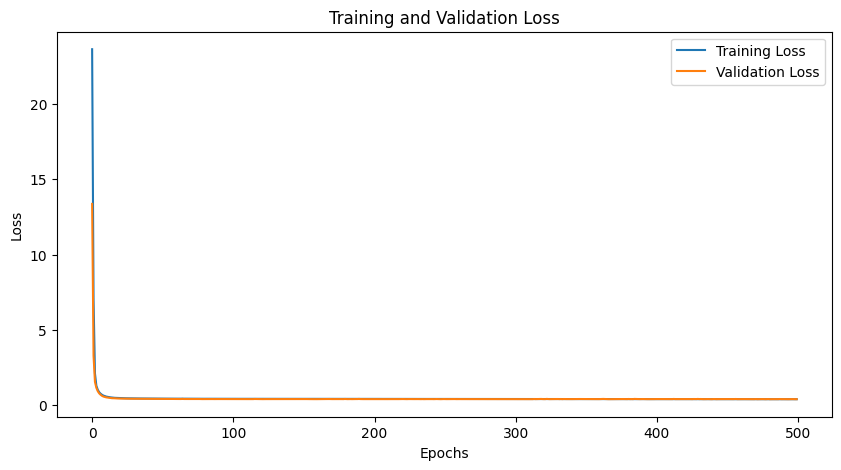

In [35]:
res = []
for i in range(1):
    normal_model = WineMLP(n_inputs=train_x.shape[1], hidden_size=8)
    criterion = nn.MSELoss()  # MSE for regression
    optimiser = torch.optim.SGD(normal_model.parameters(), lr=0.0001,  momentum=0.9)
    loss_valid, loss_train = train_model(normal_model, train_loader, val_loader, criterion, optimiser, 500)
    res.append(compute_mse(normal_model,test_x, test_y))

plot_model_metrics(loss_train, loss_valid)

In [36]:
print(f'Valid MSE: {compute_mse(normal_model,test_x, test_y)}')

Valid MSE: 0.4050429165363312


In [37]:
print(f'Test MSE: {compute_mse(normal_model,test_x, test_y)}')

Test MSE: 0.4050429165363312


## Normalising + Increasing number of Epochs
    Increasing the number of epochs from 100-1000 gives a slight improvement to our model however the results are getting worse after the 500 epoch mark and there isn't a significant improvement from this point onwards

In [38]:
res = []
epochs = [100,250,500,750,1000]
for epoch in epochs:
    normal_model = WineMLP(n_inputs=train_x.shape[1], hidden_size=5)
    criterion = nn.MSELoss()
    optimiser = torch.optim.SGD(normal_model.parameters(), lr=0.0001,  momentum=0.9)
    loss_valid, loss_train = train_model(normal_model, train_loader, val_loader, criterion, optimiser, epoch)
    res.append(compute_mse(normal_model,test_x, test_y))

In [39]:
i = 0
for epoch in epochs:
    print(f'MSE for num_epoch({epoch}): {res[i]:.3f}')
    i += 1

MSE for num_epoch(100): 0.402
MSE for num_epoch(250): 0.387
MSE for num_epoch(500): 0.408
MSE for num_epoch(750): 0.400
MSE for num_epoch(1000): 0.407


## Trying Adam as the optimiser
- Trying Adam as the optimiser with everything else being the same, we see that the training speed slows down significantly since it has an adaptive learning rate and maybe we 0.0001 is too low to begin with
- Increasing the the learning rate to 0.001 the improves the learning speed significantly even though the performance still isn't as good as SGD
- Increasing the epochs to 500 brings the performance to the same level as SGD.

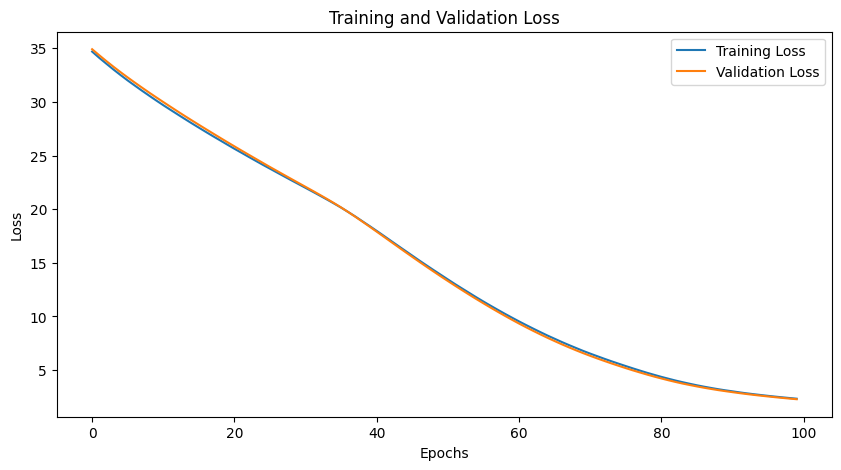

In [40]:
normal_model = WineMLP(n_inputs=train_x.shape[1], hidden_size=5)
criterion = nn.MSELoss()  # MSE for regression
optimiser = torch.optim.Adam(normal_model.parameters(), lr=0.0001)
loss_valid, loss_train = train_model(normal_model, train_loader, val_loader, criterion, optimiser, 100)
plot_model_metrics(loss_train, loss_valid)

In [41]:
print(f'MSE: {compute_mse(normal_model,test_x, test_y)}')

MSE: 2.0648887157440186


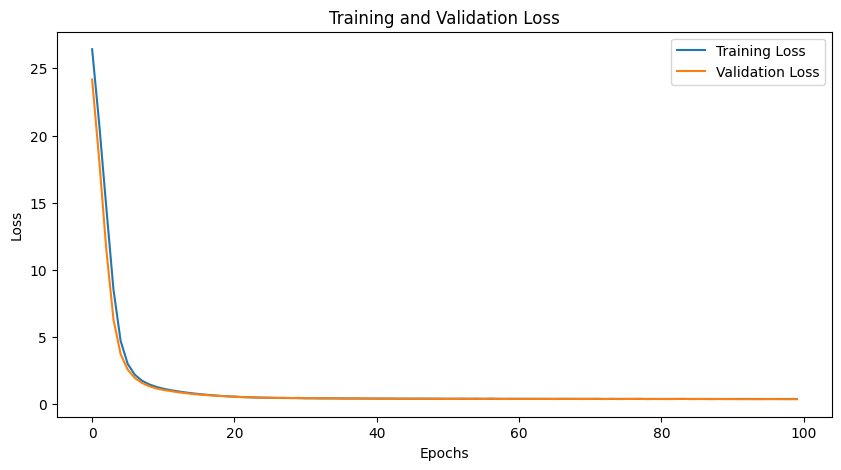

In [42]:
normal_model = WineMLP(n_inputs=train_x.shape[1], hidden_size=5)
criterion = nn.MSELoss()  # MSE for regression
optimiser = torch.optim.Adam(normal_model.parameters(), lr=0.001)
loss_valid, loss_train = train_model(normal_model, train_loader, val_loader, criterion, optimiser, 100)
res.append(compute_mse(normal_model,test_x, test_y))
plot_model_metrics(loss_train, loss_valid)

In [43]:
print(f'MSE: {compute_mse(normal_model,test_x, test_y)}')

MSE: 0.3985808789730072


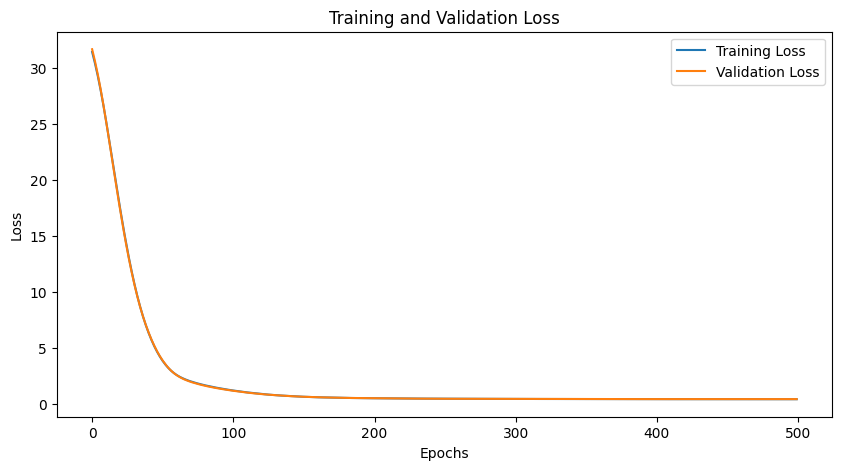

In [44]:
res = []
# for i in range(5):
normal_model = WineMLP(n_inputs=train_x.shape[1], hidden_size=5)
criterion = nn.MSELoss()  # MSE for regression
optimiser = torch.optim.Adam(normal_model.parameters(), lr=0.0001)
loss_valid, loss_train = train_model(normal_model, train_loader, val_loader, criterion, optimiser, 500)
res.append(compute_mse(normal_model,test_x, test_y))
plot_model_metrics(loss_train, loss_valid)

In [45]:
compute_mse(normal_model,test_x,test_y)

0.4256450831890106

## Changing the Hidden Size
- Changing the hidden size has no notable difference on our performance.

In [46]:
hidden_model = WineMLP(n_inputs=train_x.shape[1], hidden_size=5)
criterion = nn.MSELoss()  # MSE for regression
optimiser = torch.optim.SGD(hidden_model.parameters(), lr=0.0001,  momentum=0.9)
loss_valid, loss_train = train_model(hidden_model, train_loader, val_loader, criterion, optimiser, 100)
print(f'MSE: {compute_mse(hidden_model,test_x, test_y)}')

MSE: 0.39776402711868286


In [47]:
hidden_model = WineMLP(n_inputs=train_x.shape[1], hidden_size=8)
criterion = nn.MSELoss()  # MSE for regression
optimiser = torch.optim.SGD(hidden_model.parameters(), lr=0.0001,  momentum=0.9)
loss_valid, loss_train = train_model(hidden_model, train_loader, val_loader, criterion, optimiser, 100)
print(f'MSE: {compute_mse(hidden_model,test_x, test_y)}')

MSE: 0.41624748706817627


In [48]:
hidden_model = WineMLP(n_inputs=train_x.shape[1], hidden_size=10)
criterion = nn.MSELoss()  # MSE for regression
optimiser = torch.optim.SGD(hidden_model.parameters(), lr=0.0001,  momentum=0.9)
loss_valid, loss_train = train_model(hidden_model, train_loader, val_loader, criterion, optimiser, 100)
print(f'MSE: {compute_mse(hidden_model,test_x, test_y)}')

MSE: 0.4110611379146576


## Adding an extra to the MLP
- Again, we do not see any significant benefits from adding an additional layer to the MLP. The final MSE hovers around the 0.38-0.40 range.

In [49]:
class ImprovedWineMLP(nn.Module):
    def __init__(self, n_inputs, hidden_size):
        super(ImprovedWineMLP, self).__init__()
        self.linear1 = nn.Linear(n_inputs, hidden_size)        
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()
        
    def forward(self, X):
        out = self.linear1(X)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.relu(out)
        out = self.linear3(out)
        return out

In [50]:
improved_model = ImprovedWineMLP(n_inputs=train_x.shape[1], hidden_size=5)
criterion = nn.MSELoss()  # MSE for regression
optimiser = torch.optim.SGD(improved_model.parameters(), lr=0.0001,  momentum=0.9)
loss_valid, loss_train = train_model(improved_model, train_loader, val_loader, criterion, optimiser, 100)
print(f'MSE: {compute_mse(improved_model,test_x, test_y)}')    

MSE: 0.3987128436565399


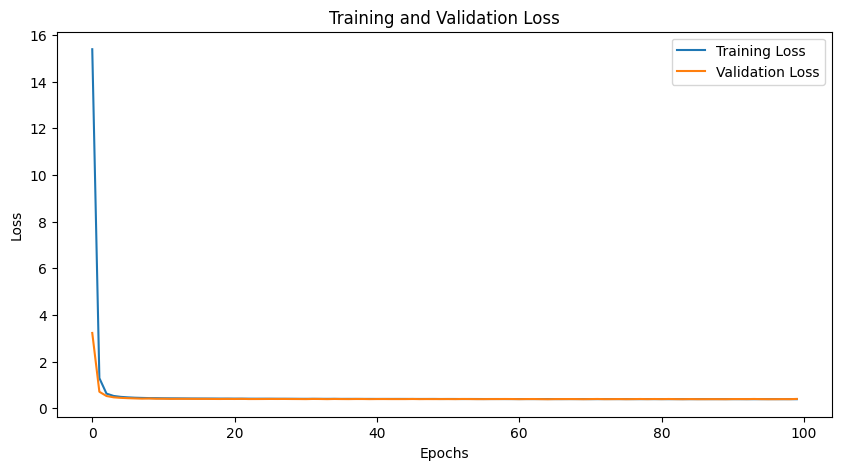

In [51]:
plot_model_metrics(loss_train, loss_valid)

In [52]:
print(compute_mse(improved_model,valid_x, valid_y))

0.3968140780925751


In [53]:
final_model = WineMLP(n_inputs=train_x.shape[1], hidden_size=8)
criterion = nn.MSELoss()  # MSE for regression
optimiser = torch.optim.SGD(final_model.parameters(), lr=0.0001,  momentum=0.9)
loss_valid, loss_train = train_model(final_model, train_loader, val_loader, criterion, optimiser, 500)
print(f'MSE: {compute_mse(improved_model,test_x, test_y)}')

MSE: 0.3987128436565399


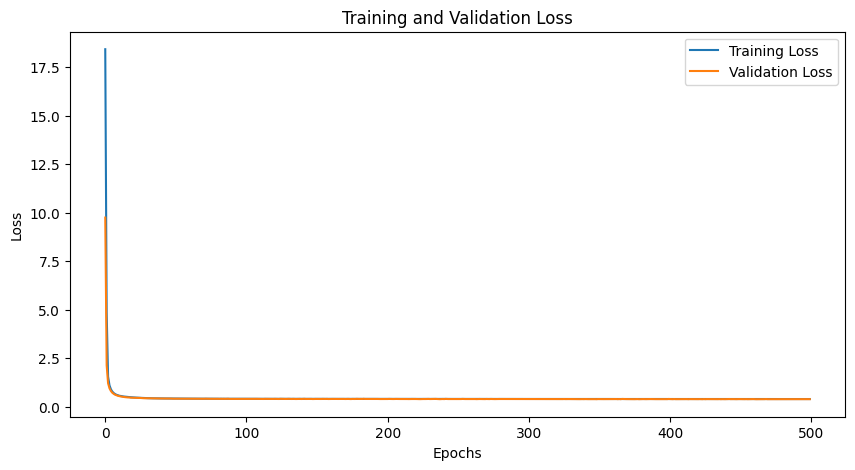

In [54]:
plot_model_metrics(loss_train, loss_valid)

In [55]:
print(compute_mse(improved_model,valid_x, valid_y))

0.3968140780925751


## Final Model
- Given our analysis thus far, I am using the following parameters for our final model:
- lr = 0.0001
- optimiser = sgd
- 1 hidden layer
- 5 hidden size

In [101]:
final_model = WineMLP(n_inputs=train_x.shape[1], hidden_size=5)
criterion = nn.MSELoss()  # MSE for regression
optimiser = torch.optim.SGD(final_model.parameters(), lr=0.0001,  momentum=0.9)
loss_valid, loss_train = train_model(final_model, train_loader, val_loader, criterion, optimiser, 500)
print(f'MSE: {compute_mse(final_model,test_x, test_y)}')

MSE: 0.37583237886428833


In [102]:
print_metrics(final_model,test_x, test_y)

MSE: 0.37583238


In [103]:
print_metrics(final_model,valid_x, valid_y)

MSE: 0.37168378


In [111]:
print(f'The RMSE has dropped to {sqrt(0.375):.3f} from {sqrt(0.505):.3f}')

The RMSE has dropped to 0.612 from 0.711


# Conclusions:

- Our base model has an MSE of 0.505 and our final model has an MSE of 0.375. This is an reduction of 25% in the MSE value.
- We can also observe a similar value of 0.371 when we check metrics on the validation data.
- The vast majority of improvements come from normalizing the input data.
- Adding extra layers, changing the optimiser, hidden size, changing the learning rate, etc introduce arbitrary improvements to our model so it is difficult to determine what changes make a real significant difference.
- These changes in MSE indicate an improvement in RMSE from 0.71 to 0.61 which is a roughly a 14% improvement